# DBSCAN (Density-based Spatial Clustering of Application with Noise) 

## Clustering Algorithm

In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

%matplotlib inline

## Step 1 : Preprocessing Data

In [3]:
dataset = pd.read_csv('dataset - 2020-09-24.csv')
df = dataset.copy()
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [4]:
# Mengisi nilai NaN dengan value 0
df = df.fillna(value = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           571 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             571 non-null    object 
 5   Age                     571 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         571 non-null    float64
 11  Headed goals            571 non-null    float64
 12  Goals with right foot   571 non-null    float64
 13  Goals with left foot    571 non-null    float64
 14  Penalties scored        571 non-null    fl

In [5]:
sample = df[['Age', 'Goals']]
sample

,Age,Goals
0,28.0,0
1,26.0,0
2,25.0,0
3,25.0,7
4,23.0,1
...,...,...
566,20.0,3
567,29.0,32
568,24.0,5
569,18.0,0


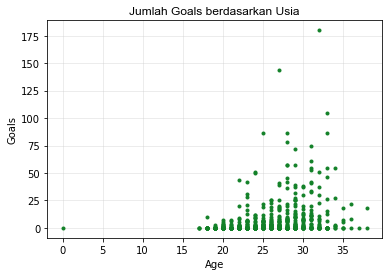

In [33]:
# visualisasi point sebelum clustering

plt.plot(df['Age'], df['Goals'],
            marker = '.', linewidth = 0, color = '#128128')
plt.grid(which = 'major', color = '#cccccc', alpha = 0.45)
plt.title('Jumlah Goals berdasarkan Usia', family = 'arial', fontsize = 12)
plt.xlabel('Age')
plt.ylabel('Goals')
plt.savefig('data_berofe.png')
plt.show()

## Step 2 : DBSCAN Algorithm

In [7]:
dbscan_data = df[['Age', 'Goals']]

# Mengubah / memastikan type value ke dalam float
dbscan_data = dbscan_data.values.astype('float32', copy = False)
dbscan_data

array([[28.,  0.],
       [26.,  0.],
       [25.,  0.],
       ...,
       [24.,  5.],
       [18.,  0.],
       [20.,  0.]], dtype=float32)

In [8]:
# Normalisasi Data
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[ 0.50117993, -0.4362705 ],
       [ 0.05681077, -0.4362705 ],
       [-0.1653738 , -0.4362705 ],
       ...,
       [-0.38755837, -0.13857636],
       [-1.7206658 , -0.4362705 ],
       [-1.2762966 , -0.4362705 ]], dtype=float32)

In [25]:
# Model DBSCAN
'''
eps = float, default=0.5
min_samples = int, default=5

untuk dokumetasi lebih : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

'''

model = DBSCAN(eps = 0.5, min_samples = 5, metric = 'euclidean').fit(dbscan_data)
model

DBSCAN()

## Step 3 : Visualisasi Hasil

In [26]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [27]:
outliers_df = df[model.labels_ == -1]
clusters_df = df[model.labels_ != -1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

clusters = Counter(model.labels_)
print(clusters)
print(df[model.labels_ == -1].head())
print('Number of Clusters = {}'.format(len(clusters)-1))

Counter({0: 544, -1: 19, 1: 8})
                  Name  Jersey Number            Club    Position Nationality  \
140     Olivier Giroud           18.0         Chelsea     Forward      France   
169  Christian Benteke           17.0  Crystal-Palace     Forward     Belgium   
196        Richarlison            7.0         Everton     Forward      Brazil   
198       Theo Walcott           11.0         Everton     Forward     England   
241     Ezgjan Alioski           10.0    Leeds-United  Midfielder           0   

      Age  Appearances  Wins  Losses  Goals  ...  Punches  High Claims  \
140  33.0          238   133      56     86  ...      0.0          0.0   
169  29.0          225    73     107     72  ...      0.0          0.0   
196  23.0          111    41      47     31  ...      0.0          0.0   
198  31.0          346   176      93     75  ...      0.0          0.0   
241   0.0            1     1       0      0  ...      0.0          0.0   

     Catches  Sweeper clearances  Th

##### Didapat Total Cluster = 2

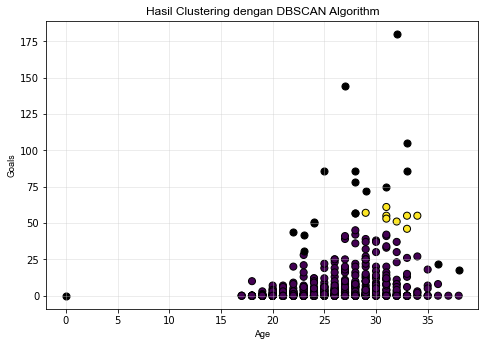

In [37]:
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df['Age'], clusters_df['Goals'], c = colors_clusters, edgecolors = 'black', s = 50)
ax.scatter(outliers_df['Age'], outliers_df['Goals'], c = color_outliers, edgecolors = 'black', s = 50)

ax.set_xlabel('Age', family = 'Arial', fontsize = 9)
ax.set_ylabel('Goals', family = 'Arial', fontsize = 9)

plt.title('Hasil Clustering dengan DBSCAN Algorithm', family ='Arial', fontsize = 12)
plt.grid(which = 'major', color = '#cccccc', alpha = 0.45)

plt.savefig("data_clustering.png")
plt.show()